In [ ]:
# import os
# import zipfile
# import requests
# from io import BytesIO
# from typing import Tuple, List, Dict, Any

# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import seaborn as sns
# from PIL import Image
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# import tensorflow as tf
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Dense, Dropout, Flatten
# from tensorflow.keras.optimizers import Adamax
# from tensorflow.keras.metrics import Precision, Recall
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.applications import Xception
# from keras.callbacks import EarlyStopping

In [ ]:
# def create_dataframe_from_directory(path: str) -> pd.DataFrame:
#     """
#     Create a DataFrame from the image directory structure.

#     Args:
#         path (str): Path to the image directory.

#     Returns:
#         pd.DataFrame: DataFrame with image paths and their corresponding class labels.
#     """
#     classes = []
#     class_paths = []
#     for label in os.listdir(path):
#         label_dir = os.path.join(path, label)
#         if os.path.isdir(label_dir):
#             for image in os.listdir(label_dir):
#                 image_path = os.path.join(label_dir, image)
#                 class_paths.append(image_path)
#                 classes.append(label)
    
#     return pd.DataFrame({'Class Path': class_paths, 'Class': classes})

In [ ]:
# def plot_class_distribution(df: pd.DataFrame) -> None:
#     """
#     Plot the distribution of classes in the DataFrame.

#     Args:
#         df (pd.DataFrame): DataFrame containing the image paths and class labels.
#     """
#     plt.figure(figsize=(15, 7))
#     ax = sns.countplot(data=df, y='Class', hue='Class', palette='viridis', dodge=False)
#     if ax.get_legend() is not None:
#         ax.get_legend().remove()
#     plt.xlabel('')
#     plt.ylabel('')
#     plt.title('Count of images in each class', fontsize=20)
#     for container in ax.containers:
#         ax.bar_label(container, label_type='edge', padding=10)
#     plt.show()

In [ ]:
# def create_image_generators(df_train: pd.DataFrame, df_valid: pd.DataFrame, df_test: pd.DataFrame,
#                             batch_size: int = 16, img_size: Tuple[int, int] = (224, 224)) -> Tuple[ImageDataGenerator, ImageDataGenerator, ImageDataGenerator]:
#     """
#     Create ImageDataGenerator instances for training, validation, and testing.

#     Args:
#         df_train (pd.DataFrame): DataFrame with training image paths and class labels.
#         df_valid (pd.DataFrame): DataFrame with validation image paths and class labels.
#         df_test (pd.DataFrame): DataFrame with test image paths and class labels.
#         batch_size (int): Number of images to yield per batch.
#         img_size (Tuple[int, int]): Target size of the images.

#     Returns:
#         Tuple[ImageDataGenerator, ImageDataGenerator, ImageDataGenerator]: ImageDataGenerator instances for training, validation, and testing.
#     """
#     train_datagen = ImageDataGenerator(brightness_range=(0.8, 1.2))
#     valid_test_datagen = ImageDataGenerator()

#     train_gen = train_datagen.flow_from_dataframe(
#         dataframe=df_train,
#         x_col='Class Path',
#         y_col='Class',
#         batch_size=batch_size,
#         target_size=img_size
#     )

#     valid_gen = valid_test_datagen.flow_from_dataframe(
#         dataframe=df_valid,
#         x_col='Class Path',
#         y_col='Class',
#         batch_size=batch_size,
#         target_size=img_size
#     )

#     test_gen = valid_test_datagen.flow_from_dataframe(
#         dataframe=df_test,
#         x_col='Class Path',
#         y_col='Class',
#         batch_size=batch_size,
#         target_size=img_size,
#         shuffle=False
#     )

#     return train_gen, valid_gen, test_gen

In [ ]:
# def plot_sample_images(generator, classes, num_samples=16):
#     """
#     Muestra una muestra de imágenes con sus respectivas clases.

#     Args:
#         generator (tf.keras.preprocessing.image.ImageDataGenerator): Generador de imágenes.
#         classes (list): Lista de clases.
#         num_samples (int): Número de imágenes a mostrar.
#     """
#     images, labels = next(generator)
#     plt.figure(figsize=(20, 20))

#     for i in range(num_samples):
#         plt.subplot(4, 4, i + 1)
#         image = images[i] / 255
#         plt.imshow(image)
#         class_name = classes[np.argmax(labels[i])]
#         plt.title(class_name, color='k', fontsize=20)
    
#     plt.show()

In [ ]:
# def build_model(num_classes: int) -> Model:
#     """
#     Build and compile the model using Xception as the base.

#     Args:
#         num_classes (int): Number of classes in the dataset.

#     Returns:
#         Model: Compiled Keras model.
#     """
#     base_model = Xception(include_top=False, weights='imagenet', input_shape=(224, 224, 3), pooling=None)
#     inputs = tf.keras.Input(shape=(224, 224, 3))
#     x = base_model(inputs, training=False)
#     x = Flatten()(x)
#     x = Dense(128, activation='relu')(x)
#     outputs = Dense(num_classes, activation='softmax')(x)
#     model = tf.keras.Model(inputs, outputs)
#     model.compile(optimizer=Adamax(learning_rate=0.001),
#                   loss='categorical_crossentropy',
#                   metrics=['accuracy'])
    
#     return model

In [ ]:
# def plot_training_history(history: tf.keras.callbacks.History) -> None:
#     """
#     Plot the training and validation accuracy and loss over epochs.

#     Args:
#         history (tf.keras.callbacks.History): History object from the model training.
#     """
#     plt.figure(figsize=(12, 6))
#     plt.subplot(1, 2, 1)
#     plt.plot(history.history['accuracy'], label='Train Accuracy')
#     plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
#     plt.title('Model Accuracy')
#     plt.xlabel('Epoch')
#     plt.ylabel('Accuracy')
#     plt.legend()

#     plt.subplot(1, 2, 2)
#     plt.plot(history.history['loss'], label='Train Loss')
#     plt.plot(history.history['val_loss'], label='Validation Loss')
#     plt.title('Model Loss')
#     plt.xlabel('Epoch')
#     plt.ylabel('Loss')
#     plt.legend()

#     plt.show()

In [ ]:
# def plot_confusion_matrix(y_true: pd.Series, y_pred: np.ndarray, class_names: List[str]) -> None:
#     """
#     Plot the confusion matrix.

#     Args:
#         y_true (pd.Series): True class labels.
#         y_pred (np.ndarray): Predicted class labels.
#         class_names (List[str]): List of class names.
#     """
#     cm = confusion_matrix(y_true, y_pred)
#     plt.figure(figsize=(10, 7))
#     sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues')
#     plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names, rotation=0)
#     plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names, rotation=0)
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.title('Confusion Matrix')
#     plt.show()

In [ ]:
# # Load and prepare data
# train_path = './Dataset/train'
# test_path = './Dataset/test'

# train_df = create_dataframe_from_directory(train_path)
# test_df = create_dataframe_from_directory(test_path)

In [ ]:
# train_df

In [ ]:
# test_df

In [ ]:
# # Split the test data for validation
# valid_df, test_df = train_test_split(test_df, train_size=0.5, random_state=20)

In [ ]:
# valid_df

In [ ]:
# test_df

In [ ]:
# # Plot class distribution
# plot_class_distribution(train_df)
# plot_class_distribution(test_df)

In [ ]:
# # Create ImageDataGenerators
# train_gen, valid_gen, test_gen = create_image_generators(train_df, valid_df, test_df)

In [ ]:
# # Build and compile model
# num_classes = len(train_gen.class_indices)
# model = build_model(num_classes)

In [ ]:
# # Model summary
# model.summary()

In [ ]:
# # Plot sample images
# class_dict = train_gen.class_indices
# classes = list(class_dict.keys())
# plot_sample_images(train_gen, classes)

In [ ]:
# # Train the model
# early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=3)
# history = model.fit(
#     train_gen,
#     epochs=5,
#     validation_data=valid_gen,
#     shuffle=False,
#     callbacks=[early_stopping]
# )

In [ ]:
# # Plot training history
# plot_training_history(history)

In [ ]:
# # Evaluate the model
# test_gen.reset()
# y_pred = model.predict(test_gen)
# y_pred_classes = np.argmax(y_pred, axis=1)
# class_names = list(train_gen.class_indices.keys())

In [ ]:
# # Convert predictions to class names
# y_true = test_df['Class']
# y_pred_labels = [class_names[idx] for idx in y_pred_classes]

In [ ]:
# # Print classification report and accuracy
# print(classification_report(y_true, y_pred_labels))
# print(f"Accuracy of the Model: {accuracy_score(y_true, y_pred_labels) * 100:.1f}%")

In [ ]:
# # Plot confusion matrix
# plot_confusion_matrix(y_true, y_pred_labels, class_names)

In [ ]:
# # Save the model
# model.save("coffee_Model.h5")

## Modelo Alternativo

In [ ]:
from tensorflow.keras.applications import ResNet50, InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

- ImageDataGenerator facilita la carga de datos y la aplicación de transformaciones en tiempo real, lo que ayuda a mejorar la generalización del modelo.
- Rescalar las imágenes (rescale=1./255) es esencial porque los pesos preentrenados de modelos como ResNet50 y InceptionV3 se ajustan a imágenes en el rango [0, 1].

In [ ]:
# Parámetros de entrada
input_shape = (224, 224, 3)
batch_size = 32

# Generadores de datos para entrenamiento y validación
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Utilizamos un 20% de los datos para validación
)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # conjunto de entrenamiento
)

validation_generator = train_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  # conjunto de validación
)

Aquí elegimos el modelo ResNet50 o InceptionV3. Ambos modelos vienen preentrenados en ImageNet y vamos a reutilizar sus capas convolucionales:

- ResNet50: Este modelo es excelente para tareas de clasificación en imágenes, ya que su arquitectura residual ayuda a mitigar el problema del desvanecimiento del gradiente.
- InceptionV3: Este modelo combina convoluciones de diferentes tamaños y puede capturar información a diferentes escalas, lo que lo hace muy eficaz para la clasificación de imágenes.
- Congelamos las capas del modelo base para aprovechar los pesos preentrenados y solo entrenamos las capas superiores que añadimos.

In [ ]:
# Cargar el modelo base preentrenado en ImageNet
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
# base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)

# Congelar las capas del modelo base
base_model.trainable = False

# Agregar capas adicionales
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Crear el modelo final
model = Model(inputs=base_model.input, outputs=predictions)

Ahora compilamos el modelo con un optimizador y una función de pérdida adecuados:

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Configuración de Callbacks:

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('coffee_Model.keras', save_best_only=True, monitor='val_loss')

callbacks = [early_stopping, model_checkpoint]

Entrenamiento del modelo:

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=50,
    callbacks=callbacks
)

In [ ]:
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation Loss: {loss}')
print(f'Validation Accuracy: {accuracy}')

In [ ]:
# Graficar el Accuracy y el Loss
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida del Modelo')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

In [ ]:
# Evaluación en el conjunto de validación
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = validation_generator.classes

In [ ]:
# Reporte de clasificación
print(classification_report(y_true, y_pred_classes, target_names=validation_generator.class_indices.keys()))

In [ ]:
# Matriz de confusión
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Verdad')
plt.show()

In [ ]:
def create_image_generators(df_train: pd.DataFrame, df_valid: pd.DataFrame, df_test: pd.DataFrame,
                            batch_size: int = 16, img_size: Tuple[int, int] = (224, 224)) -> Tuple[ImageDataGenerator, ImageDataGenerator, ImageDataGenerator]:
    """
    Create ImageDataGenerator instances for training, validation, and testing.

    Args:
        df_train (pd.DataFrame): DataFrame with training image paths and class labels.
        df_valid (pd.DataFrame): DataFrame with validation image paths and class labels.
        df_test (pd.DataFrame): DataFrame with test image paths and class labels.
        batch_size (int): Number of images to yield per batch.
        img_size (Tuple[int, int]): Target size of the images.

    Returns:
        Tuple[ImageDataGenerator, ImageDataGenerator, ImageDataGenerator]: ImageDataGenerator instances for training, validation, and testing.
    """
    train_datagen = ImageDataGenerator(
        rescale=1./255,  # Normalizar las imágenes
        brightness_range=(0.8, 1.2),
        rotation_range=20,  # Rotaciones aleatorias
        width_shift_range=0.2,  # Cambios de escala horizontal
        height_shift_range=0.2,  # Cambios de escala vertical
        shear_range=0.2,  # Cortes aleatorios
        zoom_range=0.2,  # Zoom aleatorio
        horizontal_flip=True  # Flip horizontal
    )
    valid_test_datagen = ImageDataGenerator(rescale=1./255)

    train_gen = train_datagen.flow_from_dataframe(
        dataframe=df_train,
        x_col='Class Path',
        y_col='Class',
        batch_size=batch_size,
        target_size=img_size
    )

    valid_gen = valid_test_datagen.flow_from_dataframe(
        dataframe=df_valid,
        x_col='Class Path',
        y_col='Class',
        batch_size=batch_size,
        target_size=img_size
    )

    test_gen = valid_test_datagen.flow_from_dataframe(
        dataframe=df_test,
        x_col='Class Path',
        y_col='Class',
        batch_size=batch_size,
        target_size=img_size,
        shuffle=False
    )

    return train_gen, valid_gen, test_gen


In [ ]:
def plot_sample_images(generator, classes, num_samples=16):
    """
    Muestra una muestra de imágenes con sus respectivas clases.

    Args:
        generator (tf.keras.preprocessing.image.ImageDataGenerator): Generador de imágenes.
        classes (list): Lista de clases.
        num_samples (int): Número de imágenes a mostrar.
    """
    images, labels = next(generator)
    plt.figure(figsize=(20, 20))

    for i in range(num_samples):
        plt.subplot(4, 4, i + 1)
        image = images[i]
        plt.imshow(image)
        class_name = classes[np.argmax(labels[i])]
        plt.title(class_name, color='k', fontsize=20)
        plt.axis('off')  # Eliminar los ejes para mejor visualización
    
    plt.show()


In [ ]:
train_gen, valid_gen, test_gen = create_image_generators(train_df, valid_df, test_df)

In [ ]:
# Build and compile model
num_classes = len(train_gen.class_indices)
model = build_model(num_classes)

In [ ]:
# Model summary
model.summary()

In [ ]:
# Plot sample images
class_dict = train_gen.class_indices
classes = list(class_dict.keys())
plot_sample_images(train_gen, classes)

In [ ]:
# Train the model
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=3)
history = model.fit(
    train_gen,
    epochs=5,
    validation_data=valid_gen,
    shuffle=True,
    callbacks=[early_stopping]
)

In [ ]:
# Plot training history
plot_training_history(history)

In [ ]:
# Evaluate the model
test_gen.reset()
y_pred = model.predict(test_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
class_names = list(train_gen.class_indices.keys())

In [ ]:
# Convert predictions to class names
y_true = test_df['Class']
y_pred_labels = [class_names[idx] for idx in y_pred_classes]

In [ ]:
# Print classification report and accuracy
print(classification_report(y_true, y_pred_labels))
print(f"Accuracy of the Model: {accuracy_score(y_true, y_pred_labels) * 100:.1f}%")

In [ ]:
# Plot confusion matrix
plot_confusion_matrix(y_true, y_pred_labels, class_names)

In [ ]:
# Save the model
model.save("coffee_Model.h5")

In [ ]:
# Additional Data Augmentation Techniques
train_datagen = ImageDataGenerator(
    brightness_range=(0.8, 1.2),
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=40
)

In [ ]:
# Parameters
img_size = (224, 224)  # Image size
batch_size = 32  # Batch size

In [ ]:
train_gen = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    x_col='Class Path',
    y_col='Class',
    batch_size=batch_size,
    target_size=img_size
)

In [ ]:
# Re-train the model with augmented data
history_aug = model.fit(
    train_gen,
    epochs=5,
    validation_data=valid_gen,
    shuffle=True,
    callbacks=[early_stopping]
)

In [ ]:
# Plot training history for augmented data
plot_training_history(history_aug)

In [ ]:
# Evaluate the model with augmented data
test_gen.reset()
y_pred_aug = model.predict(test_gen)
y_pred_classes_aug = np.argmax(y_pred_aug, axis=1)
y_pred_labels_aug = [class_names[idx] for idx in y_pred_classes_aug]

In [ ]:
# Print classification report and accuracy for augmented data
print("Classification report with augmented data:")
print(classification_report(y_true, y_pred_labels_aug))
print(f"Accuracy of the Model with Augmented Data: {accuracy_score(y_true, y_pred_labels_aug) * 100:.1f}%")

In [ ]:
# Plot confusion matrix for augmented data
print("Confusion Matrix with Augmented Data:")
plot_confusion_matrix(y_true, y_pred_labels_aug, class_names)

nuevo

In [1]:

import os
import zipfile
import requests
from io import BytesIO
from typing import Tuple, List, Dict, Any

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adamax, Adam
from tensorflow.keras.metrics import Precision, Recall
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception, ResNet50, InceptionV3
from keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import GlobalAveragePooling2D

In [2]:
# Parameters
img_size = (224, 224) 
batch_size = 32  

In [3]:

def create_dataframe_from_directory(path: str) -> pd.DataFrame:
    """
    Create a DataFrame from the image directory structure.

    Args:
        path (str): Path to the image directory.

    Returns:
        pd.DataFrame: DataFrame with image paths and their corresponding class labels.
    """
    classes = []
    class_paths = []
    for label in os.listdir(path):
        label_dir = os.path.join(path, label)
        if os.path.isdir(label_dir):
            for image in os.listdir(label_dir):
                image_path = os.path.join(label_dir, image)
                class_paths.append(image_path)
                classes.append(label)
    
    return pd.DataFrame({'Class Path': class_paths, 'Class': classes})

In [4]:
def plot_class_distribution(df: pd.DataFrame) -> None:
    """
    Plot the distribution of classes in the DataFrame.

    Args:
        df (pd.DataFrame): DataFrame containing the image paths and class labels.
    """
    plt.figure(figsize=(15, 7))
    ax = sns.countplot(data=df, y='Class', hue='Class', palette='viridis', dodge=False)
    
    if ax.get_legend() is not None:
        ax.get_legend().remove()
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Count of images in each class', fontsize=20)
    
    for container in ax.containers:
        ax.bar_label(container, label_type='edge', padding=10)
    
    plt.show()

In [5]:
def create_image_generators(df_train: pd.DataFrame, df_valid: pd.DataFrame, df_test: pd.DataFrame,
                            batch_size: int = 16, img_size: Tuple[int, int] = (224, 224)) -> Tuple[ImageDataGenerator, ImageDataGenerator, ImageDataGenerator]:
    """
    Create ImageDataGenerator instances for training, validation, and testing.

    Args:
        df_train (pd.DataFrame): DataFrame with training image paths and class labels.
        df_valid (pd.DataFrame): DataFrame with validation image paths and class labels.
        df_test (pd.DataFrame): DataFrame with test image paths and class labels.
        batch_size (int): Number of images to yield per batch.
        img_size (Tuple[int, int]): Target size of the images.

    Returns:
        Tuple[ImageDataGenerator, ImageDataGenerator, ImageDataGenerator]: ImageDataGenerator instances for training, validation, and testing.
    """
    train_datagen = ImageDataGenerator(
        brightness_range=(0.8, 1.2),
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        rotation_range=40
    )
    
    valid_test_datagen = ImageDataGenerator()

    train_gen = train_datagen.flow_from_dataframe(
        dataframe=df_train,
        x_col='Class Path',
        y_col='Class',
        batch_size=batch_size,
        target_size=img_size,
        class_mode='categorical'
    )

    valid_gen = valid_test_datagen.flow_from_dataframe(
        dataframe=df_valid,
        x_col='Class Path',
        y_col='Class',
        batch_size=batch_size,
        target_size=img_size,
        class_mode='categorical'
    )

    test_gen = valid_test_datagen.flow_from_dataframe(
        dataframe=df_test,
        x_col='Class Path',
        y_col='Class',
        batch_size=batch_size,
        target_size=img_size,
        shuffle=False,
        class_mode='categorical'
    )

    return train_gen, valid_gen, test_gen

In [6]:
def plot_sample_images(generator, classes, num_samples=16):
    """
    Muestra una muestra de imágenes con sus respectivas clases.

    Args:
        generator (tf.keras.preprocessing.image.ImageDataGenerator): Generador de imágenes.
        classes (list): Lista de clases.
        num_samples (int): Número de imágenes a mostrar.
    """
    images, labels = next(generator)
    plt.figure(figsize=(20, 20))

    for i in range(num_samples):
        plt.subplot(4, 4, i + 1)
        image = images[i] / 255
        plt.imshow(image)
        class_name = classes[np.argmax(labels[i])]
        plt.title(class_name, color='k', fontsize=20)
    
    plt.show()

In [7]:
def build_model(num_classes: int) -> Model:
    """
    Build and compile the model using Xception as the base.

    Args:
        num_classes (int): Number of classes in the dataset.

    Returns:
        Model: Compiled Keras model.
    """
    base_model = Xception(include_top=False, weights='imagenet', input_shape=(224, 224, 3), pooling=None)
    inputs = tf.keras.Input(shape=(224, 224, 3))
    x = base_model(inputs, training=False)
    x = Flatten()(x)
    x = Dense(128, activation='relu')(x)
    outputs = Dense(num_classes, activation='softmax')(x)
    model = tf.keras.Model(inputs, outputs)
    model.compile(optimizer=Adamax(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [8]:
def plot_training_history(history: tf.keras.callbacks.History) -> None:
    """
    Plot the training and validation accuracy and loss over epochs.

    Args:
        history (tf.keras.callbacks.History): History object from the model training.
    """
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

In [9]:
def plot_confusion_matrix(y_true: pd.Series, y_pred: np.ndarray, class_names: List[str]) -> None:
    """
    Plot the confusion matrix.

    Args:
        y_true (pd.Series): True class labels.
        y_pred (np.ndarray): Predicted class labels.
        class_names (List[str]): List of class names.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues')
    plt.xticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names, rotation=0)
    plt.yticks(ticks=np.arange(len(class_names)) + 0.5, labels=class_names, rotation=0)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [10]:
# Load and prepare data
train_path = './Dataset/train'
test_path = './Dataset/test'

In [11]:
train_df = create_dataframe_from_directory(train_path)
test_df = create_dataframe_from_directory(test_path)

In [12]:
train_df

Class Path   Class
0          ./Dataset/train\Dark\dark (1).png    Dark
1         ./Dataset/train\Dark\dark (10).png    Dark
2        ./Dataset/train\Dark\dark (100).png    Dark
3        ./Dataset/train\Dark\dark (101).png    Dark
4        ./Dataset/train\Dark\dark (102).png    Dark
...                                      ...     ...
1035  ./Dataset/train\Medium\medium (95).png  Medium
1036  ./Dataset/train\Medium\medium (96).png  Medium
1037  ./Dataset/train\Medium\medium (97).png  Medium
1038  ./Dataset/train\Medium\medium (98).png  Medium
1039  ./Dataset/train\Medium\medium (99).png  Medium

[1040 rows x 2 columns]

In [13]:
valid_df, test_df = train_test_split(test_df, train_size=0.5, random_state=20)

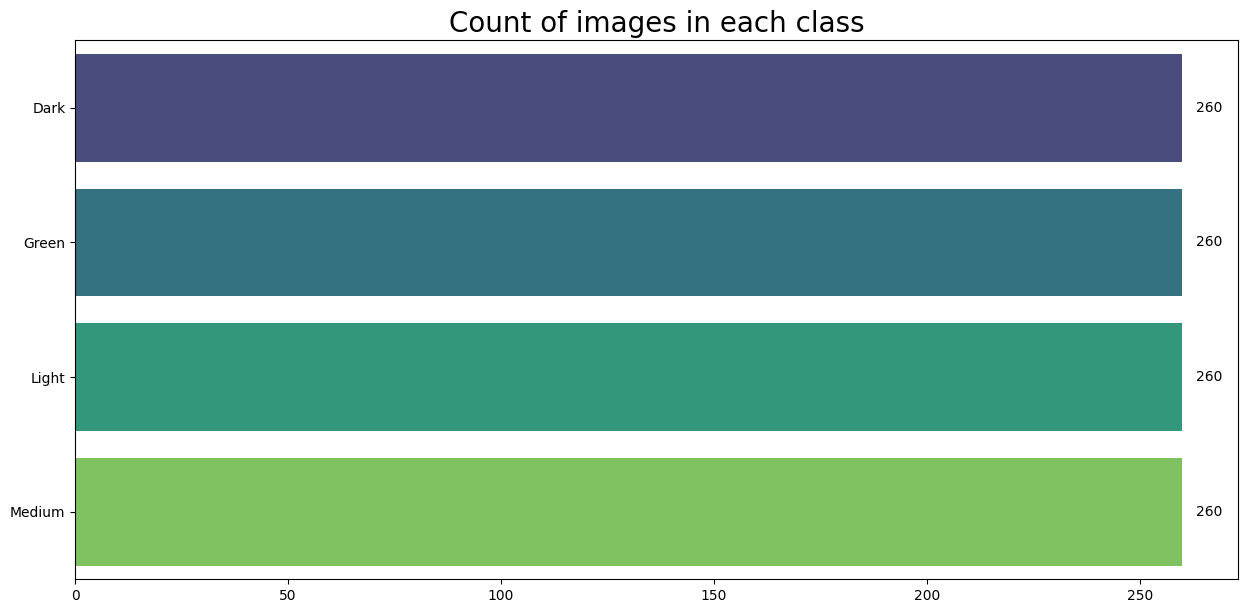

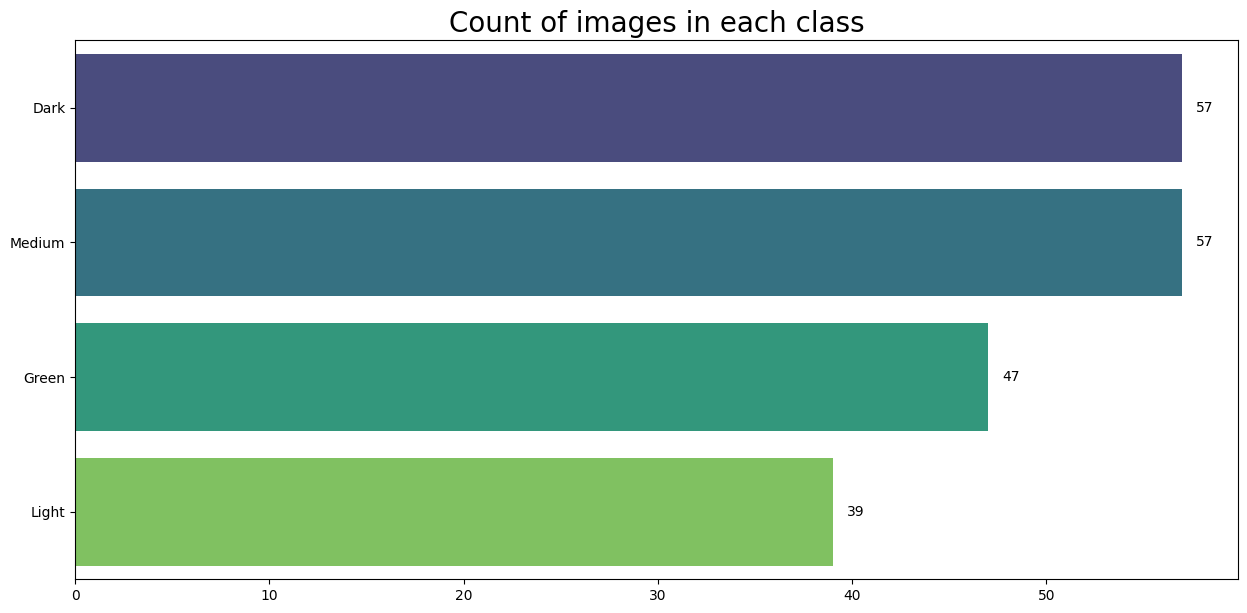

In [14]:
plot_class_distribution(train_df)
plot_class_distribution(test_df)

In [15]:
train_gen, valid_gen, test_gen = create_image_generators(train_df, valid_df, test_df, batch_size=batch_size, img_size=img_size)

Found 1040 validated image filenames belonging to 4 classes.
Found 200 validated image filenames belonging to 4 classes.
Found 200 validated image filenames belonging to 4 classes.


In [16]:
# Build and compile model
num_classes = len(train_gen.class_indices)
model = build_model(num_classes)

In [17]:
# Model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ xception (Functional)           │ (None, 7, 7, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,707,180 (128.58 MB)

 Trainable params: 33,652,652 (128.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

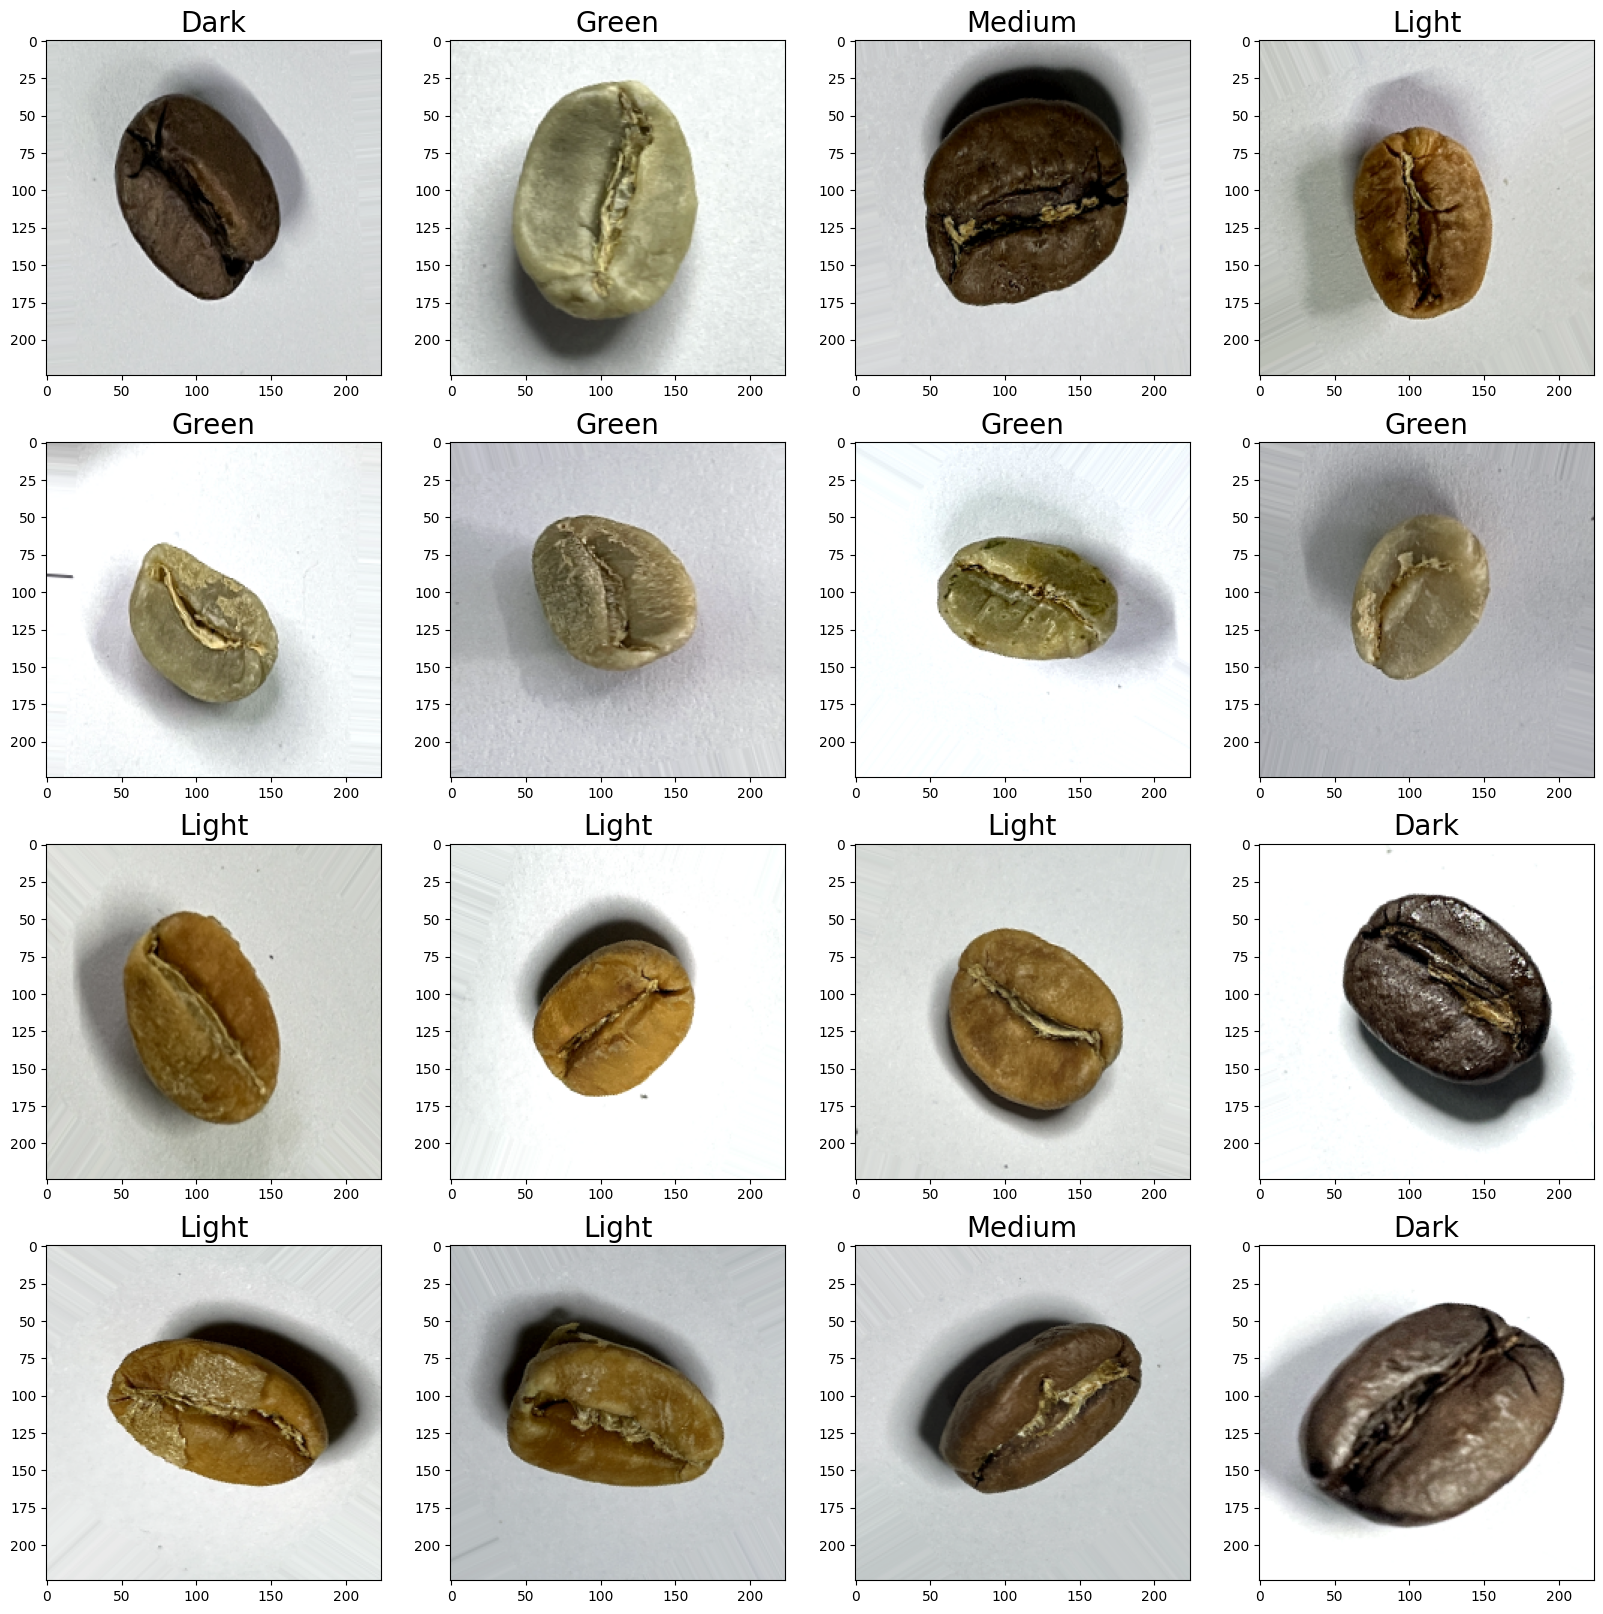

In [18]:
# Plot sample images
class_dict = train_gen.class_indices
classes = list(class_dict.keys())
plot_sample_images(train_gen, classes)

In [19]:
# Train the model
early_stopping = EarlyStopping(monitor='val_loss', mode='min', patience=3)
history = model.fit(
    train_gen,
    epochs=5,
    validation_data=valid_gen,
    shuffle=True,
    callbacks=[early_stopping]
)

Epoch 1/5


c:\Sevann\UBA\vision_computadora_II\venv\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 541s 16s/step - accuracy: 0.2528 - loss: 2.9215 - val_accuracy: 0.2150 - val_loss: 1.5457
Epoch 2/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 509s 15s/step - accuracy: 0.3840 - loss: 1.1411 - val_accuracy: 0.3800 - val_loss: 1.3625
Epoch 3/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 533s 16s/step - accuracy: 0.7083 - loss: 0.8445 - val_accuracy: 0.6350 - val_loss: 0.7597
Epoch 4/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 549s 16s/step - accuracy: 0.8546 - loss: 0.3319 - val_accuracy: 0.8450 - val_loss: 0.4901
Epoch 5/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 532s 16s/step - accuracy: 0.9831 - loss: 0.0753 - val_accuracy: 0.8000 - val_loss: 0.5442


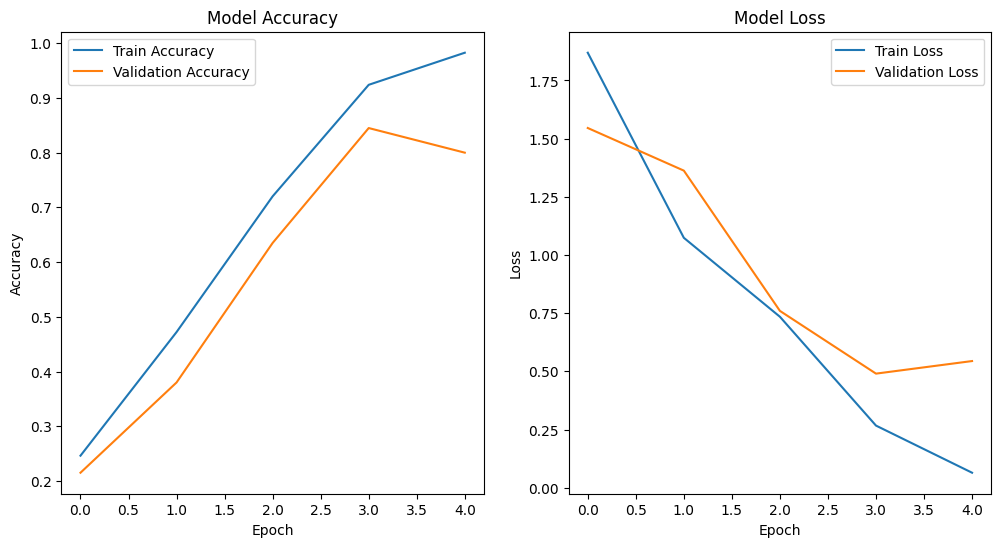

In [20]:
# Plot training history
plot_training_history(history)

In [21]:
# Evaluate the model
test_gen.reset()
y_pred = model.predict(test_gen)
y_pred_classes = np.argmax(y_pred, axis=1)
class_names = list(train_gen.class_indices.keys())

7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step


In [22]:
# Convert predictions to class names
y_true = test_df['Class']
y_pred_labels = [class_names[idx] for idx in y_pred_classes]

# Convert both y_true and y_pred_labels to categorical (string) labels
y_true_labels = y_true.astype(str)
y_pred_labels = [class_names[idx] for idx in y_pred_classes]

In [23]:
# Print classification report and accuracy
print(classification_report(y_true_labels, y_pred_labels))
print(f"Accuracy: {accuracy_score(y_true_labels, y_pred_labels):.4f}")

              precision    recall  f1-score   support

        Dark       1.00      0.95      0.97        57
       Green       0.94      1.00      0.97        47
       Light       1.00      0.38      0.56        39
      Medium       0.70      1.00      0.83        57

    accuracy                           0.86       200
   macro avg       0.91      0.83      0.83       200
weighted avg       0.90      0.86      0.85       200

Accuracy: 0.8650


In [24]:
# Plot confusion matrix
def plot_confusion_matrix(y_true: pd.Series, y_pred: List[str], class_names: List[str]) -> None:
    """
    Plot the confusion matrix.
    
    Parameters:
        y_true (pd.Series): True labels.
        y_pred (List[str]): Predicted labels.
        class_names (List[str]): List of class names.
    """
    cm = confusion_matrix(y_true, y_pred, labels=class_names)
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='g', vmin=0, cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()


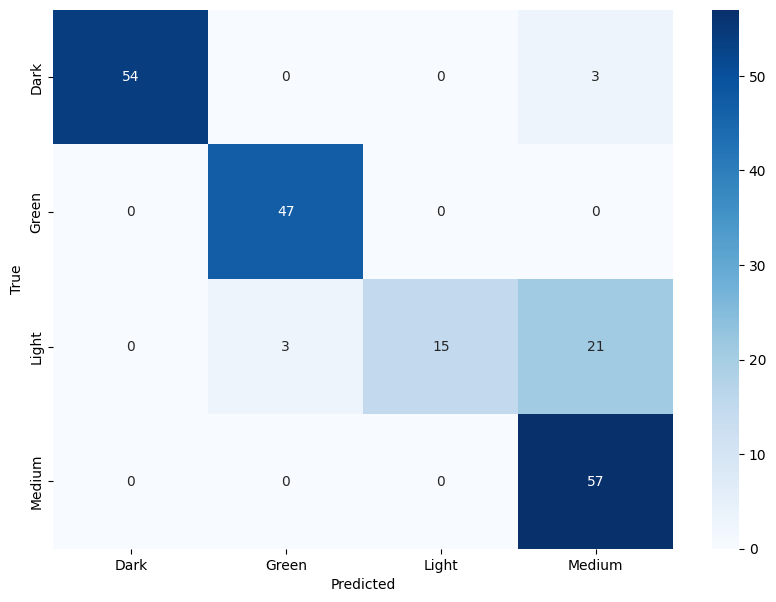

In [25]:
plot_confusion_matrix(y_true_labels, y_pred_labels, class_names)

In [26]:
# Optionally, save the model
model.save('trained_model.h5')

In [27]:
def create_image_generators_xception(df_train: pd.DataFrame, df_valid: pd.DataFrame, df_test: pd.DataFrame,
                            batch_size: int = 16, img_size: Tuple[int, int] = (224, 224)) -> Tuple[ImageDataGenerator, ImageDataGenerator, ImageDataGenerator]:
    
    train_datagen = ImageDataGenerator(brightness_range=(0.8, 1.2))
    valid_test_datagen = ImageDataGenerator()

    train_gen = train_datagen.flow_from_dataframe(
        dataframe=df_train,
        x_col='Class Path',
        y_col='Class',
        batch_size=batch_size,
        target_size=img_size
    )

    valid_gen = valid_test_datagen.flow_from_dataframe(
        dataframe=df_valid,
        x_col='Class Path',
        y_col='Class',
        batch_size=batch_size,
        target_size=img_size
    )

    test_gen = valid_test_datagen.flow_from_dataframe(
        dataframe=df_test,
        x_col='Class Path',
        y_col='Class',
        batch_size=batch_size,
        target_size=img_size,
        shuffle=False
    )

    return train_gen, valid_gen, test_gen

In [28]:
train_df

Class Path   Class
0          ./Dataset/train\Dark\dark (1).png    Dark
1         ./Dataset/train\Dark\dark (10).png    Dark
2        ./Dataset/train\Dark\dark (100).png    Dark
3        ./Dataset/train\Dark\dark (101).png    Dark
4        ./Dataset/train\Dark\dark (102).png    Dark
...                                      ...     ...
1035  ./Dataset/train\Medium\medium (95).png  Medium
1036  ./Dataset/train\Medium\medium (96).png  Medium
1037  ./Dataset/train\Medium\medium (97).png  Medium
1038  ./Dataset/train\Medium\medium (98).png  Medium
1039  ./Dataset/train\Medium\medium (99).png  Medium

[1040 rows x 2 columns]

In [29]:
valid_df

Class Path   Class
345   ./Dataset/test\Medium\medium (5).png  Medium
399  ./Dataset/test\Medium\medium (99).png  Medium
330  ./Dataset/test\Medium\medium (36).png  Medium
238    ./Dataset/test\Light\light (43).png   Light
293    ./Dataset/test\Light\light (93).png   Light
..                                     ...     ...
393  ./Dataset/test\Medium\medium (93).png  Medium
218    ./Dataset/test\Light\light (25).png   Light
223     ./Dataset/test\Light\light (3).png   Light
271    ./Dataset/test\Light\light (73).png   Light
355  ./Dataset/test\Medium\medium (59).png  Medium

[200 rows x 2 columns]

In [30]:
# Create ImageDataGenerators
train_gen_xception, valid_gen_xception, test_gen_xception = create_image_generators_xception(train_df, valid_df, test_df)

Found 1040 validated image filenames belonging to 4 classes.
Found 200 validated image filenames belonging to 4 classes.
Found 200 validated image filenames belonging to 4 classes.


In [31]:
# Build and compile model
num_classes = len(train_gen_xception.class_indices)
model_xception = build_model(num_classes)

In [32]:
model_xception.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ xception (Functional)           │ (None, 7, 7, 2048)     │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,707,180 (128.58 MB)

 Trainable params: 33,652,652 (128.37 MB)

 Non-trainable params: 54,528 (213.00 KB)

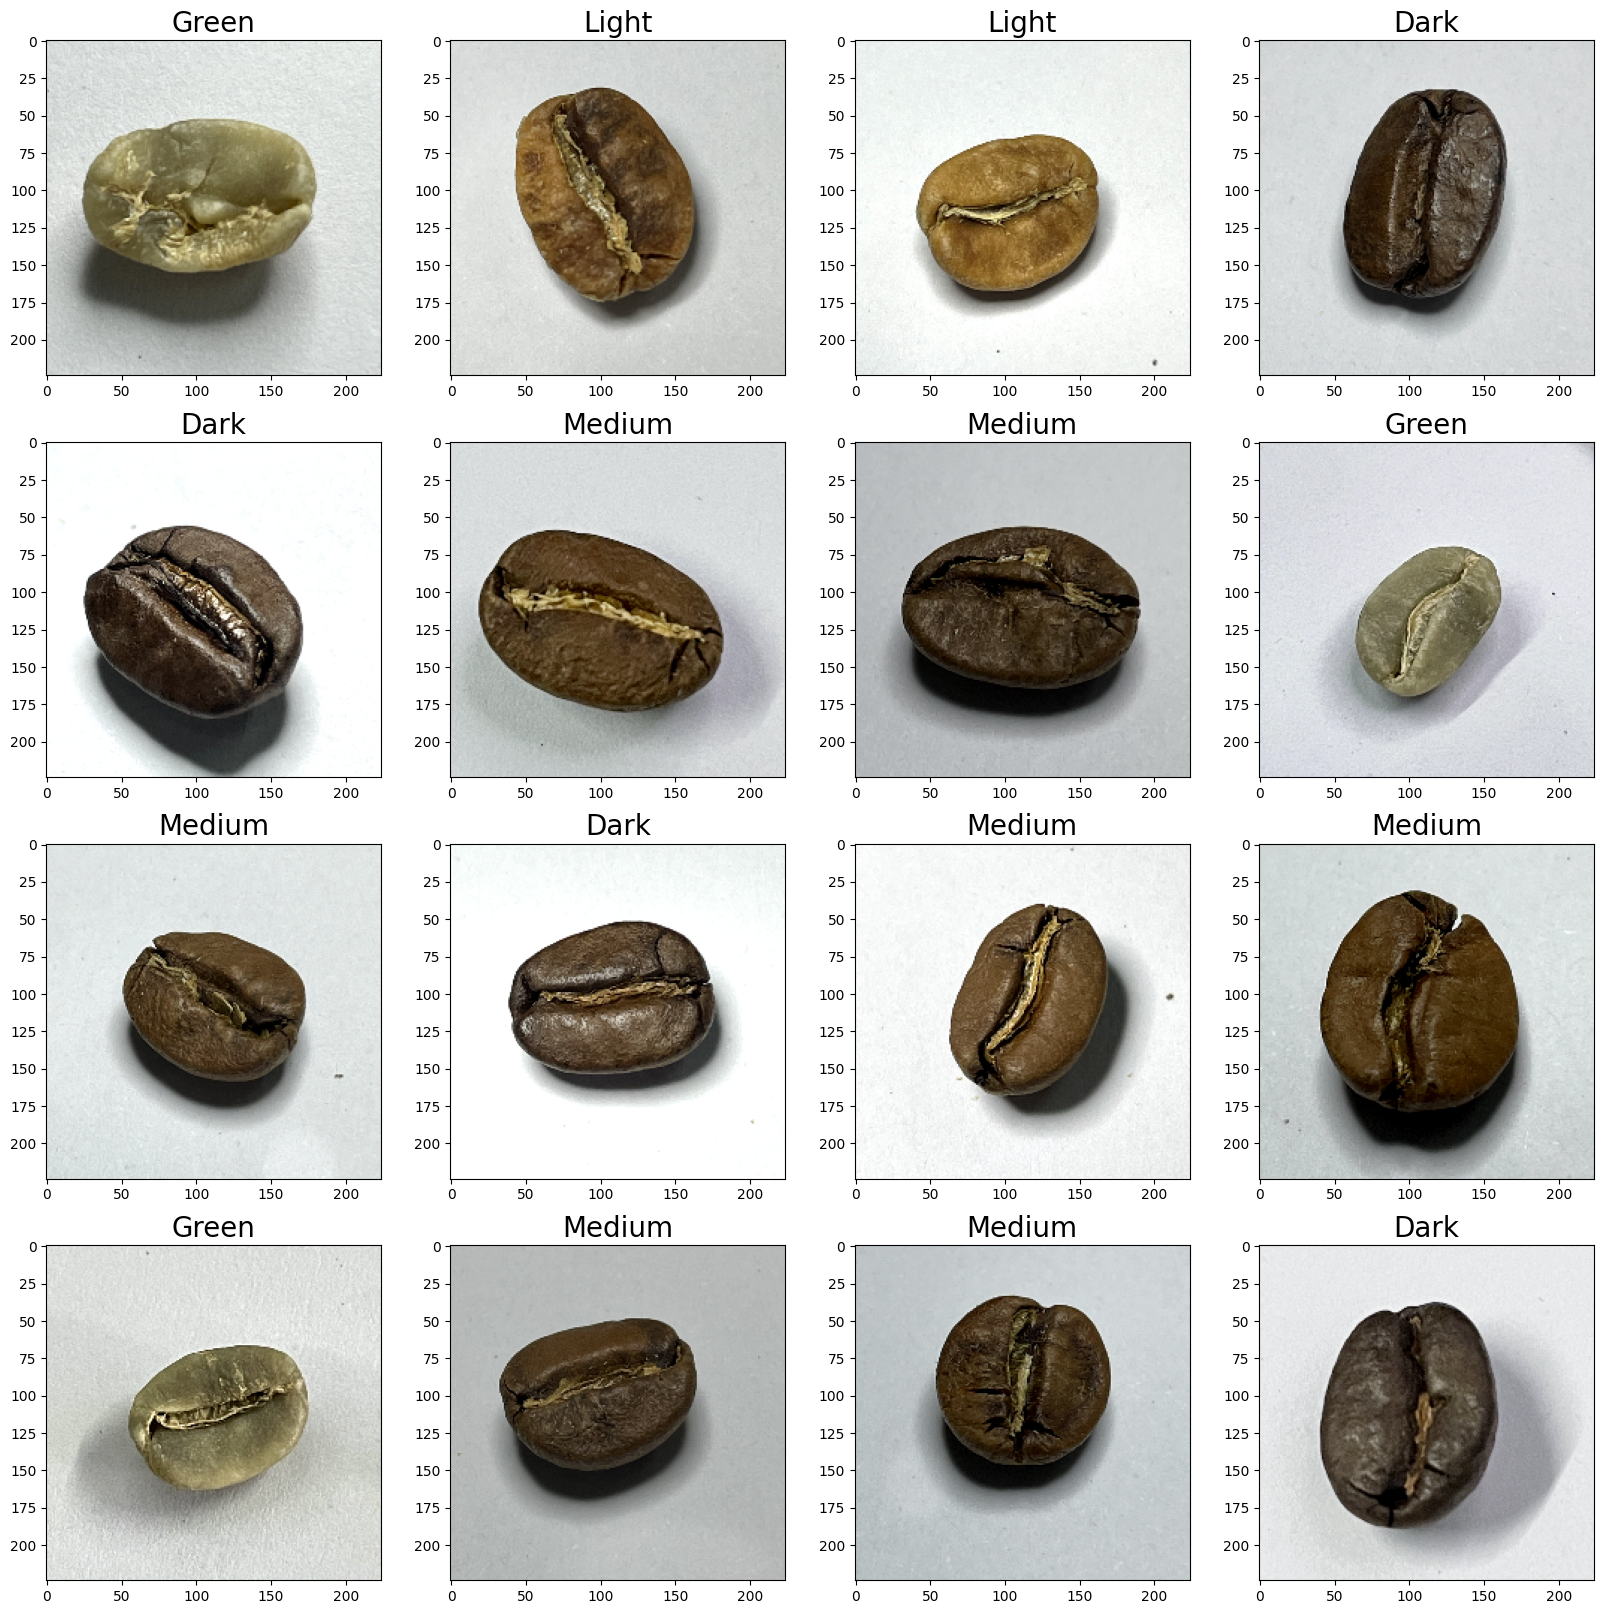

In [33]:
# Plot sample images
class_dict_xception = train_gen_xception.class_indices
classes_xception = list(class_dict_xception.keys())
plot_sample_images(train_gen_xception, classes_xception)

In [35]:
# Train the model
early_stopping_xception = EarlyStopping(monitor='val_loss', mode='min', patience=3)
history_xception = model_xception.fit(
    train_gen_xception,
    epochs=5,
    validation_data=valid_gen_xception,
    shuffle=False,
    callbacks=[early_stopping_xception]
)

Epoch 1/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 531s 8s/step - accuracy: 0.9573 - loss: 0.1412 - val_accuracy: 0.9950 - val_loss: 0.0088
Epoch 2/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 441s 7s/step - accuracy: 0.9635 - loss: 0.1369 - val_accuracy: 0.9750 - val_loss: 0.0888
Epoch 3/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 444s 7s/step - accuracy: 0.9860 - loss: 0.0412 - val_accuracy: 0.9900 - val_loss: 0.0865
Epoch 4/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 440s 7s/step - accuracy: 0.9918 - loss: 0.0431 - val_accuracy: 0.9850 - val_loss: 0.0690


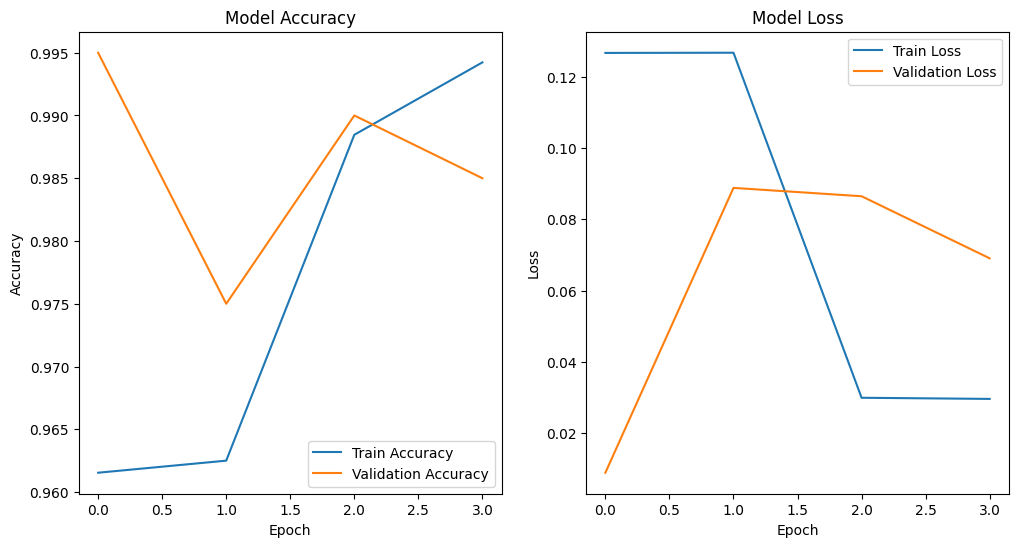

In [36]:
# Plot training history
plot_training_history(history_xception)

In [37]:
# Evaluate the model
test_gen_xception.reset()
y_pred_xception = model_xception.predict(test_gen_xception)
y_pred_classes_xception = np.argmax(y_pred_xception, axis=1)
class_names_xception = list(train_gen_xception.class_indices.keys())

13/13 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step


In [38]:
# Convert predictions to class names
y_true = test_df['Class']
y_pred_labels_xception = [class_names_xception[idx] for idx in y_pred_classes_xception]

In [39]:
# Print classification report and accuracy
print(classification_report(y_true, y_pred_labels_xception))
print(f"Accuracy of the Model: {accuracy_score(y_true, y_pred_labels_xception) * 100:.1f}%")

              precision    recall  f1-score   support

        Dark       1.00      1.00      1.00        57
       Green       1.00      1.00      1.00        47
       Light       1.00      1.00      1.00        39
      Medium       1.00      1.00      1.00        57

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Accuracy of the Model: 100.0%


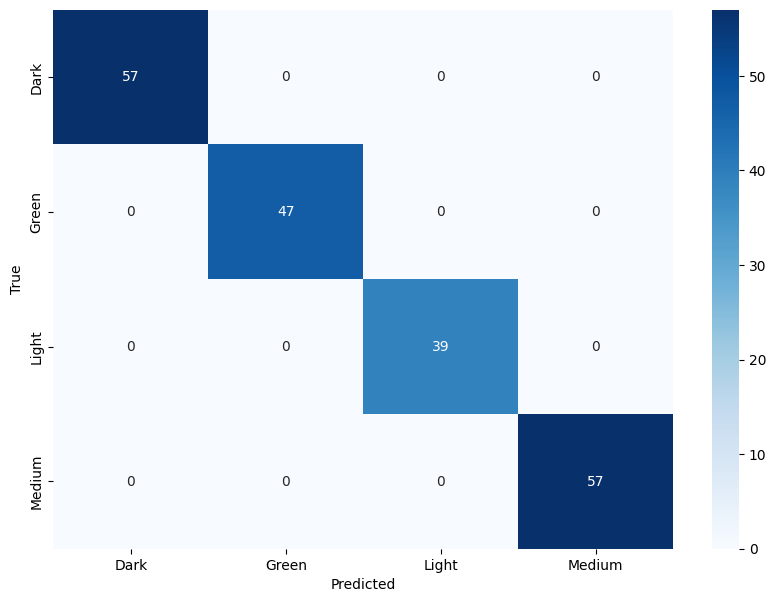

In [40]:
# Plot confusion matrix
plot_confusion_matrix(y_true, y_pred_labels_xception, class_names_xception)

In [41]:
# Save the model
model.save("coffee_Model_xception.h5")